# Process
 
 ### Data Cleaning
 In this phase the data will be uploaded, origanized, cleaned and ready for analysis. 

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

pd.options.display.max_columns = None

In [140]:
# Reading files 

# Daily Datasets
daily_activity  = pd.read_csv("/Users/gurilyall/Downloads/Analysis Projects/4. bellabeat_raw_data/csv_files/dailyActivity_merged.csv")
daily_calories   = pd.read_csv("/Users/gurilyall/Downloads/Analysis Projects/4. bellabeat_raw_data/csv_files/dailyCalories_merged.csv")
daily_intensities  = pd.read_csv("/Users/gurilyall/Downloads/Analysis Projects/4. bellabeat_raw_data/csv_files/dailyIntensities_merged.csv")
daily_steps  = pd.read_csv("/Users/gurilyall/Downloads/Analysis Projects/4. bellabeat_raw_data/csv_files/dailySteps_merged.csv")

# Other datasets
heartrate_seconds  = pd.read_csv("/Users/gurilyall/Downloads/Analysis Projects/4. bellabeat_raw_data/csv_files/heartrate_seconds_merged.csv")
sleep_log  = pd.read_csv("/Users/gurilyall/Downloads/Analysis Projects/4. bellabeat_raw_data/csv_files/sleepDay_merged.csv")
weight_log  = pd.read_csv("/Users/gurilyall/Downloads/Analysis Projects/4. bellabeat_raw_data/csv_files/weightLogInfo_merged.csv")
print("successful")

successful


In [141]:
# Checking column names of all the dataframes

print("Daily Activity\n",daily_activity.columns,
      "\n\nDaily Calories\n",daily_calories.columns,
      "\n\nDaily Intensities\n",daily_intensities.columns,
      "\n\nDaily Steps\n",daily_steps.columns,
      "\n\nHeart Rate\n",heartrate_seconds.columns,
      "\n\nSleep Log\n",sleep_log.columns)

Daily Activity
 Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'], dtype='object') 

Daily Calories
 Index(['Id', 'ActivityDay', 'Calories'], dtype='object') 

Daily Intensities
 Index(['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance', 'LightActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance'], dtype='object') 

Daily Steps
 Index(['Id', 'ActivityDay', 'StepTotal'], dtype='object') 

Heart Rate
 Index(['Id', 'Time', 'Value'], dtype='object') 

Sleep Log
 Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'], dtype='object')


lets check the size, shape & datatypes of all the datasets.

In [142]:
# checking data shape, size and data types
print('Activity Size:', daily_activity.size, 
      "\nactivity Shape:" , daily_activity.shape, 
      '\nData types:\n',daily_activity.dtypes )

print(f'{"-"*50}\nCalories Size:', daily_calories.size, 
      "\ncalories Shape:" , daily_calories.shape, 
      '\nData types:\n',daily_calories.dtypes )

print(f'{"-"*50}\nData Intensities Size:', daily_intensities.size, 
      "\ndata Shape:" , daily_intensities.shape, 
      '\nData types:\n',daily_intensities.dtypes )

print(f'{"-"*50}\nSteps Size:', daily_steps.size, 
      "\nsteps Shape:" , daily_steps.shape, 
      '\nData types:\n',daily_steps.dtypes )

print(f'{"-"*50}\nHeart Rate Size:', heartrate_seconds.size,
      "\nHeart Rate Shape:", heartrate_seconds.shape,
      '\nData types:\n',heartrate_seconds.dtypes )

print(f'{"-"*50}\nSleep Log Size:', sleep_log.size,
      "\nSleep Log Shape:", sleep_log.shape,
      '\nData types:\n',sleep_log.dtypes )

print(f'{"-"*50}\nWeight Log Size:', weight_log.size,
      "\nWeight Log Shape:", weight_log.shape,
      '\nData types:\n',weight_log.dtypes )

Activity Size: 14100 
activity Shape: (940, 15) 
Data types:
 Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
--------------------------------------------------
Calories Size: 2820 
calories Shape: (940, 3) 
Data types:
 Id              int64
ActivityDay    object
Calories        int64
dtype: object
--------------------------------------------------
Data Intensities Size: 9400 
data Shape: (940, 10) 
Data types:
 Id                            int64
ActivityDay                  object
Seden

We will count the total number of participants by their unique IDs and analyze the frequency of their participation. By checking the value counts, we can assess the level of engagement and determine whether participants were actively involved in the dataset.

In [143]:
# checking the number of participants in each dataset
print("daily_activity Participants:", daily_activity.Id.nunique(),
      "\ndaily_calories Participants:", daily_calories.Id.nunique(),
      "\ndaily_intensities Participants:", daily_intensities.Id.nunique(),
      "\ndaily_steps Participants:", daily_steps.Id.nunique(),
      "\nHeart Rate Participants:", heartrate_seconds.Id.nunique(),
      "\nSleep Log Participants:", sleep_log.Id.nunique(),
      "\nWeight Log Participants:", weight_log.Id.nunique())

daily_activity Participants: 33 
daily_calories Participants: 33 
daily_intensities Participants: 33 
daily_steps Participants: 33 
Heart Rate Participants: 14 
Sleep Log Participants: 24 
Weight Log Participants: 8


The output shows, `Sleep Log`,`Heart Rate` and `weight_log` have `24`,`14`,`8`  different participants log-ins . All the other datasets have `33`  log-ins from 33 participants.

In the next step we will check the amounts of logins per dataset to check the participation of each person.

In [144]:
pd.set_option('display.width', 1000)  
pd.set_option('display.max_columns', None)  
# checking login(s) for each participant by ID

comparison = pd.concat([
    daily_activity['Id'].value_counts().rename('Activity'),
    daily_calories['Id'].value_counts().rename('Calories'),
    daily_intensities['Id'].value_counts().rename('Intensities'),
    daily_steps['Id'].value_counts().rename('Steps'),
    heartrate_seconds['Id'].value_counts().rename('Heartrate'),
    sleep_log['Id'].value_counts().rename('SleepLog'),
    weight_log['Id'].value_counts().rename('WeightLog')
], axis=1)

print(f"{" "*20}Login(s) for each participant by ID\n\n",comparison)

                    Login(s) for each participant by ID

             Activity  Calories  Intensities  Steps  Heartrate  SleepLog  WeightLog
Id                                                                                
1503960366        31        31           31     31        NaN      25.0        2.0
4319703577        31        31           31     31        NaN      26.0        2.0
8583815059        31        31           31     31        NaN       NaN        NaN
8378563200        31        31           31     31        NaN      32.0        NaN
8053475328        31        31           31     31        NaN       3.0        NaN
7086361926        31        31           31     31        NaN      24.0        NaN
6962181067        31        31           31     31   266326.0      31.0       30.0
5553957443        31        31           31     31   255174.0      31.0        NaN
4702921684        31        31           31     31        NaN      28.0        NaN
4558609924        31        3

For the daily datasets the particpation is good  except 1 women with `4` entries. Fewer number of women participated in heartrate_seconds, Sleep_log, weight_log according to that there are alot of `Nan`s in these 3 datasets

In this step, we are examining all the datasets to identify any missing data. This helps us understand the completeness of the datasets and determine how to handle any gaps or inconsistencies in the data moving forward.

In [145]:
# Checking for missing values in each dataset
print("daily_activity Missing Values:", daily_activity.isnull().sum().sum(),  
      "\ndaily_calories Missing Values:", daily_calories.isnull().sum().sum(),  
      "\ndaily_intensities Missing Values:", daily_intensities.isnull().sum().sum(),  
      "\ndaily_steps Missing Values:", daily_steps.isnull().sum().sum(),  
      "\nHeart Rate Missing Values:", heartrate_seconds.isnull().sum().sum(),  
      "\nSleep Log Missing Values:", sleep_log.isnull().sum().sum(),
      "\nWeight Log Missing Values:", weight_log.isnull().sum().sum())  

daily_activity Missing Values: 0 
daily_calories Missing Values: 0 
daily_intensities Missing Values: 0 
daily_steps Missing Values: 0 
Heart Rate Missing Values: 0 
Sleep Log Missing Values: 0 
Weight Log Missing Values: 65


In [146]:
weight_log.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

The weight_log dataset contains `67` rows of data, with `65` of them having null values in the `Fat` column. This indicates that most of the data is missing, limiting the insights that can be drawn from the Fat column. Meanwhile, this issue has been forwarded to the Marketing Analysis Team and Bellabeat’s IT Team for further investigation. We will not drop the data and will continue with the analysis.

Checking for Duplicated entries in the datasets.

In [147]:
# checking for duplicates
print("daily_activity Duplicates:", daily_activity.duplicated().sum(),  
      "\ndaily_calories Duplicates:", daily_calories.duplicated().sum(),  
      "\ndaily_intensities Duplicates:", daily_intensities.duplicated().sum(),  
      "\ndaily_steps Duplicates:", daily_steps.duplicated().sum(),  
      "\nHeart Rate Duplicates:", heartrate_seconds.duplicated().sum(),  
      "\nSleep Log Duplicates:", sleep_log.duplicated().sum(),
      "\nWeight Log Duplicates:", weight_log.duplicated().sum())  

daily_activity Duplicates: 0 
daily_calories Duplicates: 0 
daily_intensities Duplicates: 0 
daily_steps Duplicates: 0 
Heart Rate Duplicates: 0 
Sleep Log Duplicates: 3 
Weight Log Duplicates: 0


As per the output there are `3` duplicated entries in the sleep log dataset. In the next step, dropping the duplicated values. 

In [148]:
# dropping duplicated and null data entries
sleep_log.drop_duplicates(inplace=True)
print("Sleep Log Duplicates:", sleep_log.duplicated().sum())  


Sleep Log Duplicates: 0


# Analyze

### Data Transformation
In this Phase, we will transform the data using various methods, such as changing data types, renaming columns, merging datasets, and creating new columns or aliases. These changes will be made in a way that preserves the original data, allowing it to be accessed or reviewed if needed.

In [149]:
# renaming the columns
daily_activity = daily_activity.rename(columns = {'ActivityDate':'ActivityDay'})


In [150]:
# mering all the daily datasets into one
df1 = pd.merge(pd.merge(pd.merge(daily_activity, daily_calories, on=['Id', 'ActivityDay'], how='outer'), daily_intensities, on=['Id', 'ActivityDay'], how='outer'), daily_steps, on=['Id', 'ActivityDay'], how='outer')

print("Missing Data: ",df1.isnull().sum().sum(),
      "\nDataset Shape: ", df1.shape,
      "\nDataset Size: ", df1.size)

Missing Data:  0 
Dataset Shape:  (940, 25) 
Dataset Size:  23500


The dataset shape indicates `940` rows and `25` columns, which aligns with the combined total from the initial four datasets

Changing the format of the of all the date for all the datasets

In [151]:
# Daily dataset date formatting
df1['ActivityDay'] = pd.to_datetime(df1['ActivityDay'], format="%m/%d/%Y")

# Heart rate dataset date and time formatting
heart = heartrate_seconds.copy()
heart['Date'] = pd.to_datetime(heart['Time'], format="%m/%d/%Y %I:%M:%S %p")

# Weight log dataset date formatting
weight = weight_log.copy()
weight['Date'] = pd.to_datetime(weight['Date'], format="%m/%d/%Y %I:%M:%S %p")

# Sleep log dataset date formatting
sleep = sleep_log.copy()
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format="%m/%d/%Y %I:%M:%S %p")

print("Daily Dataset", df1['ActivityDay'].dtype,
      "\nHeart Rate Dataset", heart['Date'].dtype,
      "\nWeight Log Dataset", weight['Date'].dtype,
      "\nSleep Log Dataset", sleep['SleepDay'].dtype)

Daily Dataset datetime64[ns] 
Heart Rate Dataset datetime64[ns] 
Weight Log Dataset datetime64[ns] 
Sleep Log Dataset datetime64[ns]


Making a copy to work with, so the original data available as a back-up. Creating a new column `DayOfTheWeek` by extrating data from the `ActivityDay`. With the data available for 2 month `DayOfTheWeek` would help to understand the pattern of the fitbit data.

In [152]:
# reindex function to rearrange the data
df_2= df1.copy()

# print 1st 5 rows to confirm
df_2['DayOfTheWeek'] = df_2['ActivityDay'].dt.day_name()
df_2.DayOfTheWeek.value_counts()
# df_2.info()

heart['DayOfTheWeek'] = heart['Date'].dt.day_name()
heart.DayOfTheWeek.value_counts()

DayOfTheWeek
Tuesday      452381
Wednesday    399232
Thursday     359146
Friday       357594
Saturday     338394
Monday       289764
Sunday       287147
Name: count, dtype: int64

To save time when checking each row and column for duplicates, a function called check_columns_match was developed. This function compares data at each index for columns with the same name. To keep the process simple, columns ending with `_x` were assigned to the `x` variable, while those ending with `_y` were assigned to the `y` variable.


The function outputs whether the columns match or mismatch. If the data matches, the duplicate column will be dropped to reduce redundancy. Just to make sure the function is working properly  2 different columns were added to the variables.

In [153]:
# to check if the data in these columns are same 
x = ['VeryActiveMinutes_x', 'FairlyActiveMinutes_x', 'LightlyActiveMinutes_x', 'SedentaryMinutes_x','VeryActiveDistance_x', 'ModeratelyActiveDistance_x', 'LightActiveDistance_x', 'SedentaryActiveDistance_x', 'Calories_x','TotalSteps','TotalSteps']
y = ['VeryActiveMinutes_y', 'FairlyActiveMinutes_y', 'LightlyActiveMinutes_y', 'SedentaryMinutes_y','VeryActiveDistance_y', 'ModeratelyActiveDistance_y', 'LightActiveDistance_y', 'SedentaryActiveDistance_y', 'Calories_y','StepTotal','TrackerDistance']
    

def check_columns_match(df, col_x_list, col_y_list):
    for col_x, col_y in zip(col_x_list, col_y_list):
        match = True
        for i in range(len(df)):
            if df[col_x][i] != df[col_y][i]:
                match = False
                print(f"\nMismatch in columns '{col_x}' and '{col_y}' at index {i}")
                break

        if match:
            print(f"Match: All values in columns '{col_x}' and '{col_y}' are the same.")
        else:
            print(f"Mismatch: Not all values in columns '{col_x}' and '{col_y}' are the same.")


check_columns_match(df_2, x, y)

Match: All values in columns 'VeryActiveMinutes_x' and 'VeryActiveMinutes_y' are the same.
Match: All values in columns 'FairlyActiveMinutes_x' and 'FairlyActiveMinutes_y' are the same.
Match: All values in columns 'LightlyActiveMinutes_x' and 'LightlyActiveMinutes_y' are the same.
Match: All values in columns 'SedentaryMinutes_x' and 'SedentaryMinutes_y' are the same.
Match: All values in columns 'VeryActiveDistance_x' and 'VeryActiveDistance_y' are the same.
Match: All values in columns 'ModeratelyActiveDistance_x' and 'ModeratelyActiveDistance_y' are the same.
Match: All values in columns 'LightActiveDistance_x' and 'LightActiveDistance_y' are the same.
Match: All values in columns 'SedentaryActiveDistance_x' and 'SedentaryActiveDistance_y' are the same.
Match: All values in columns 'Calories_x' and 'Calories_y' are the same.
Match: All values in columns 'TotalSteps' and 'StepTotal' are the same.

Mismatch in columns 'TotalSteps' and 'TrackerDistance' at index 0
Mismatch: Not all va

All columns in the `x` variable `match` with those in the `y`. Therefore, to improve efficiency and reduce redundancy, all columns ending with `_y` will be dropped.

In [154]:
# deleting duplicate columns
df_2 = df_2.drop(columns = ['VeryActiveMinutes_y', 'FairlyActiveMinutes_y', 'LightlyActiveMinutes_y', 'SedentaryMinutes_y', 
        'VeryActiveDistance_y', 'ModeratelyActiveDistance_y', 'LightActiveDistance_y', 'SedentaryActiveDistance_y', 'Calories_y','StepTotal'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          940 non-null    int64         
 1   ActivityDay                 940 non-null    datetime64[ns]
 2   TotalSteps                  940 non-null    int64         
 3   TotalDistance               940 non-null    float64       
 4   TrackerDistance             940 non-null    float64       
 5   LoggedActivitiesDistance    940 non-null    float64       
 6   VeryActiveDistance_x        940 non-null    float64       
 7   ModeratelyActiveDistance_x  940 non-null    float64       
 8   LightActiveDistance_x       940 non-null    float64       
 9   SedentaryActiveDistance_x   940 non-null    float64       
 10  VeryActiveMinutes_x         940 non-null    int64         
 11  FairlyActiveMinutes_x       940 non-null    int64         

I have created a new column, `total_mins` & `total_hours`, to aggregate the total time spent across all activity phases, providing a comprehensive view of the overall activity duration.

In [155]:
#total mins column
df_2['total_mins'] = df_2['VeryActiveMinutes_x'] + df_2['FairlyActiveMinutes_x'] + df_2['LightlyActiveMinutes_x'] + df_2['SedentaryMinutes_x'] 

#total hours column
df_2['total_hours'] =round(df_2['total_mins']/60)

df_2[['total_mins','total_hours','DayOfTheWeek']].head(10)

,total_mins,total_hours,DayOfTheWeek
0,1094,18.0,Tuesday
1,1033,17.0,Wednesday
2,1440,24.0,Thursday
3,998,17.0,Friday
4,1040,17.0,Saturday
5,761,13.0,Sunday
6,1440,24.0,Monday
7,1120,19.0,Tuesday
8,1063,18.0,Wednesday
9,1076,18.0,Thursday


### Sleep
creating new column in the sleep dataset to check the awake time in bed

In [156]:
sleep['inBed_awake'] = sleep.TotalTimeInBed - sleep.TotalMinutesAsleep

print("Total Participants:", sleep.Id.nunique())
sleep.head(5)

Total Participants: 24


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,inBed_awake
0,1503960366,2016-04-12,1,327,346,19
1,1503960366,2016-04-13,2,384,407,23
2,1503960366,2016-04-15,1,412,442,30
3,1503960366,2016-04-16,2,340,367,27
4,1503960366,2016-04-17,1,700,712,12


Checking mean awake time in bed by Id

In [157]:
# checking mean sleep and awake time for each id
awake_mean_df = sleep[["Id","inBed_awake","TotalMinutesAsleep"]]

awake_mean = awake_mean_df.groupby("Id")['inBed_awake'].mean().reset_index()
sleep_mean = awake_mean_df.groupby("Id")['TotalMinutesAsleep'].mean().reset_index()

sleep_mean_df = pd.merge(awake_mean, sleep_mean, on="Id")

sleep_mean_df.columns = ["Id","mean_inBed_awake","mean_sleep"]
sleep_mean_df.head(4)

,Id,mean_inBed_awake,mean_sleep
0,1503960366,22.92,360.28
1,1644430081,52.00,294.00
2,1844505072,309.00,652.00
3,1927972279,20.80,417.00


### Weight
In the weight dataset, a new column Month was created to separate the data by month, allowing for a more detailed analysis of variations in the weightKg column.

In [158]:

# Extract the month from the 'Date' column and create a new 'Month' column
weight['Month'] = weight['Date'].dt.month
weight.Month.head()

april_raw = weight[weight['Month'] == 4]
may_raw = weight[weight['Month'] == 5]

# print(april['Id'].unique())
# print(may['Id'].unique())

april = april_raw[april_raw['Id'].isin(may_raw['Id'])]  # Full rows from April
may = may_raw[may_raw['Id'].isin(april_raw['Id'])] 
print('April Id count',april.Id.nunique(),
        '\nMay Id count',may.Id.nunique())


April Id count 5 
May Id count 5


In [159]:
april_stats = april[["BMI", "WeightKg"]].describe()
may_stats = may[["BMI", "WeightKg"]].describe()

# Combine side by side for comparison
comparison = pd.concat([april_stats, may_stats], axis=1, keys=['April', 'May'])

# Display result
print(comparison)

           April                   May           
             BMI   WeightKg        BMI   WeightKg
count  38.000000  38.000000  25.000000  25.000000
mean   24.847895  72.118422  24.894000  70.260000
std     1.170937  11.639561   1.340469  10.841549
min    21.450001  56.700001  21.690001  57.299999
25%    23.969999  61.425001  24.000000  61.500000
50%    24.840000  66.099998  24.350000  62.400002
75%    25.559999  85.099998  25.559999  84.400002
max    27.459999  85.800003  27.379999  85.500000


Going in depth to check if any  change occured in the of the participating women

In [160]:
# Checking weight and BMI for each id for April and May
april_stats = april.groupby('Id')[["BMI", "WeightKg"]].mean().rename(columns={'BMI': 'April_BMI'})
may_stats = may.groupby('Id')[["BMI", "WeightKg"]].mean().rename(columns={'BMI': 'May_BMI'})

combined_stats = pd.concat([april_stats, may_stats], axis=1)

# Display the combined stats
print(combined_stats)


            April_BMI   WeightKg    May_BMI   WeightKg
Id                                                    
2873212765  21.450001  56.700001  21.690001  57.299999
4319703577  27.450001  72.400002  27.379999  72.300003
4558609924  27.355000  70.000000  27.120000  69.399999
6962181067  24.023888  61.544445  24.034167  61.566667
8877689391  25.511250  85.225001  25.438750  84.987501


Over the two-month period of data collection, the weight dataset shows minimal variation in BMI and weight statistics across participants, indicating largely consistent results throughout the period.


### Heart
The heart dataset is the biggest dataset amoungst all the dataset in this study. Creating hour column to distribute the data in hours section to analyze property. This will help us get insight of the participant's overall movement based on the heartrate.

In [161]:
# creating new column and formatting it to hours
heart['Hour'] = pd.to_datetime(heart['Time'], format='%m/%d/%Y %I:%M:%S %p').dt.hour
heart.head(5)

,Id,Time,Value,Date,DayOfTheWeek,Hour
0,2022484408,4/12/2016 7:21:00 AM,97,2016-04-12 07:21:00,Tuesday,7
1,2022484408,4/12/2016 7:21:05 AM,102,2016-04-12 07:21:05,Tuesday,7
2,2022484408,4/12/2016 7:21:10 AM,105,2016-04-12 07:21:10,Tuesday,7
3,2022484408,4/12/2016 7:21:20 AM,103,2016-04-12 07:21:20,Tuesday,7
4,2022484408,4/12/2016 7:21:25 AM,101,2016-04-12 07:21:25,Tuesday,7


### Overall Stats
In this section, we calculate and summarize key metrics related to the participants’ activity, health, and movement patterns, which are crucial for the visualizations that will be presented later. The variables include the average mean of minutes and hours, distance  and count of the weekdays.Additionally, we analyze the average distance traveled and the total steps taken by participants, providing insights into their physical movement.

These metrics serve as the foundation for visualizing overall trends and behaviors of the participants, which will help Bellabeat understand user engagement with their devices. By analyzing these metrics, we can gain valuable insights into how active users are on average.

In [162]:
# Function for day count
def count_day(day_of_week):
    count = 0
    for day in df_2.DayOfTheWeek:
        if day == day_of_week:
            count += 1
    return count

# Count the occurrences for each day of the week
Mon = count_day("Monday")
Tue = count_day("Tuesday")
Wed = count_day("Wednesday")
Thu = count_day("Thursday")
Fri = count_day("Friday")
Sat = count_day("Saturday")
Sun = count_day("Sunday")

# Print the count for each day
print(f"\n{" "*10}Day Count",
      "\nMonday:", Mon,
      "\nTuesday:", Tue,
      "\nWednesday:", Wed,
      "\nThursday:", Thu,
      "\nFriday:", Fri,
      "\nSaturday:", Sat,
      "\nSunday:", Sun)

# Mean statistics for minutes and hours
mean_calories = round(df_2.Calories_x.mean(), 2)
mean_hours = round(df_2.total_hours.mean(), 2)
mean_sedentary = round(df_2.SedentaryMinutes_x.mean() / 60, 2)  
mean_light = round(df_2.LightlyActiveMinutes_x.mean() / 60, 2)  
mean_fairlyActive = round(df_2.FairlyActiveMinutes_x.mean(), 2)
mean_V_active = round(df_2.VeryActiveMinutes_x.mean() / 60, 2)  

print(f"\n{' ' * 10}Mean Data for minutes and hours",
      f"\nmean_calories : {mean_calories}",
      f"\nmean_hours : {mean_hours}",
      f"\nmean_sedentary : {mean_sedentary}",
      f"\nmean_light : {mean_light}",
      f"\nmean_fairlyActive : {mean_fairlyActive}",
      f"\nmean_V_active : {mean_V_active}")

# Mean distance statistics
mean_calories_d = round(df_2.Calories_x.mean(), 3)
mean_distance_d = round(df_2.TotalDistance.mean(), 3)
mean_sedentary_d = round(df_2.SedentaryActiveDistance_x.mean(), 3)
mean_light_d = round(df_2.LightActiveDistance_x.mean(), 3)
mean_moderate_d = round(df_2.ModeratelyActiveDistance_x.mean(), 3)
mean_V_active_d = round(df_2.VeryActiveDistance_x.mean(), 3)
mean_logged_d = round(df_2.LoggedActivitiesDistance.mean(), 3)
mean_tracker_d = round(df_2.TrackerDistance.mean(), 3)

print(f"\n{' ' * 10}Mean Data for Distance",
      f"\nmean_calories_d : {mean_calories_d}",
      f"\nmean_distance_d : {mean_distance_d}",
      f"\nmean_sedentary_d : {mean_sedentary_d}",
      f"\nmean_light_d : {mean_light_d}",
      f"\nmean_moderate_d : {mean_moderate_d}",
      f"\nmean_V_active_d : {mean_V_active_d}",
      f"\nmean_logged_d : {mean_logged_d}",
      f"\nmean_tracker_d : {mean_tracker_d}")

# Mean steps statistics
mean_steps = round(df_2.TotalSteps.mean(), 3)
mean_distance = round(df_2.TotalDistance.mean(), 3)

print(f"\n{' ' * 10}Mean Data for Steps",
      f"\nmean_steps : {mean_steps}",
      f"\nmean_distance : {mean_distance}")


          Day Count 
Monday: 120 
Tuesday: 152 
Wednesday: 150 
Thursday: 147 
Friday: 126 
Saturday: 124 
Sunday: 121

          Mean Data for minutes and hours 
mean_calories : 2303.61 
mean_hours : 20.31 
mean_sedentary : 16.52 
mean_light : 3.21 
mean_fairlyActive : 13.56 
mean_V_active : 0.35

          Mean Data for Distance 
mean_calories_d : 2303.61 
mean_distance_d : 5.49 
mean_sedentary_d : 0.002 
mean_light_d : 3.341 
mean_moderate_d : 0.568 
mean_V_active_d : 1.503 
mean_logged_d : 0.108 
mean_tracker_d : 5.475

          Mean Data for Steps 
mean_steps : 7637.911 
mean_distance : 5.49


In [163]:
df_2.describe()

,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,VeryActiveMinutes_x,FairlyActiveMinutes_x,LightlyActiveMinutes_x,SedentaryMinutes_x,Calories_x,total_mins,total_hours
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283


In [164]:
sleep.describe()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,inBed_awake
count,4.100000e+02,410,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,2016-04-26 11:38:55.609756160,1.119512,419.173171,458.482927,39.309756
min,1.503960e+09,2016-04-12 00:00:00,1.000000,58.000000,61.000000,0.000000
25%,3.977334e+09,2016-04-19 00:00:00,1.000000,361.000000,403.750000,17.000000
50%,4.702922e+09,2016-04-27 00:00:00,1.000000,432.500000,463.000000,25.500000
75%,6.962181e+09,2016-05-04 00:00:00,1.000000,490.000000,526.000000,40.000000
max,8.792010e+09,2016-05-12 00:00:00,3.000000,796.000000,961.000000,371.000000
std,2.060863e+09,NaN,0.346636,118.635918,127.455140,46.710932


In [165]:
weight_log.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [166]:
heart.describe()

,Id,Value,Date,Hour
count,2.483658e+06,2.483658e+06,2483658,2.483658e+06
mean,5.513765e+09,7.732842e+01,2016-04-26 19:43:52.237666304,1.242637e+01
min,2.022484e+09,3.600000e+01,2016-04-12 00:00:00,0.000000e+00
25%,4.388162e+09,6.300000e+01,2016-04-19 06:18:10,8.000000e+00
50%,5.553957e+09,7.300000e+01,2016-04-26 20:28:50,1.300000e+01
75%,6.962181e+09,8.800000e+01,2016-05-04 08:00:20,1.700000e+01
max,8.877689e+09,2.030000e+02,2016-05-12 16:20:00,2.300000e+01
std,1.950224e+09,1.940450e+01,NaN,6.174546e+00


# Share

## Visualization and Findings

This section highlights key insights from the analysis, brought to life through compelling visualizations. Charts and graphs are used to make complex data more accessible, helping to uncover trends, patterns, and actionable outcomes. The goal is to provide stakeholders with a clear and meaningful understanding of the results to guide informed decision-making.

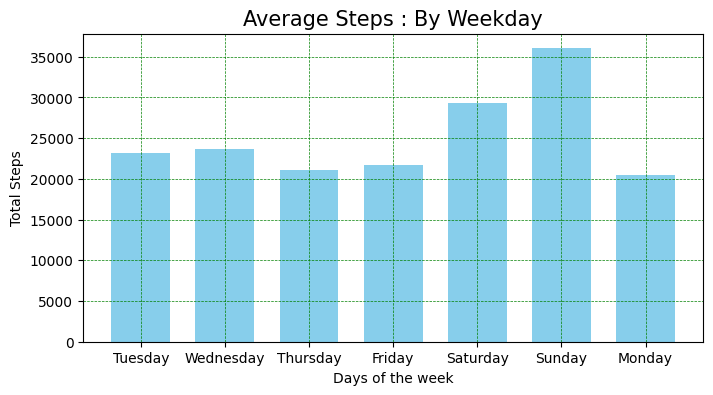

In [167]:
#Viz 1

# Bar chart
plt.figure(figsize=(8, 4))  
plt.bar(x=df_2['DayOfTheWeek'], height=df_2['TotalSteps'], width=0.7, color='skyblue')

plt.xlabel('Days of the week')
plt.xticks(rotation=0)
plt.ylabel('Total Steps')
plt.title('Average Steps : By Weekday', fontsize=15)

plt.grid(color='green', linestyle='--', linewidth=0.5)
plt.show()

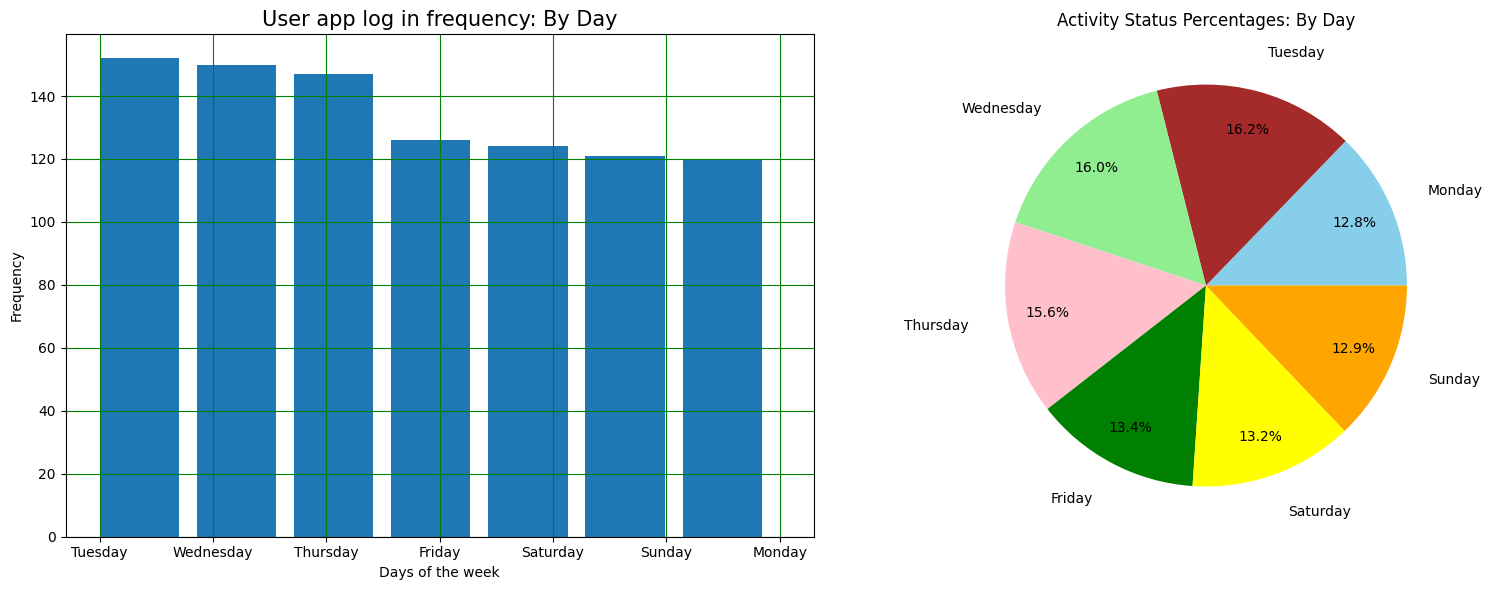

In [168]:
#Viz 2

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)  
plt.hist(df_2['DayOfTheWeek'], bins=7, width=0.7)
plt.xlabel('Days of the week')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title('User app log in frequency: By Day', fontsize=15)
plt.grid(color='green')

# Pie chart
sections = [Mon,Tue,Wed,Thu, Fri, Sat, Sun]
labels = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
explode = [0, 0, 0, 0, 0, 0, 0]
colors = ['skyblue', 'brown', 'lightgreen', 'pink', "green","yellow", "Orange"]

plt.subplot(1, 2, 2)
plt.pie(sections, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%",labeldistance=1.2, pctdistance=0.8)
plt.title("Activity Status Percentages: By Day")
plt.tight_layout()

plt.show()


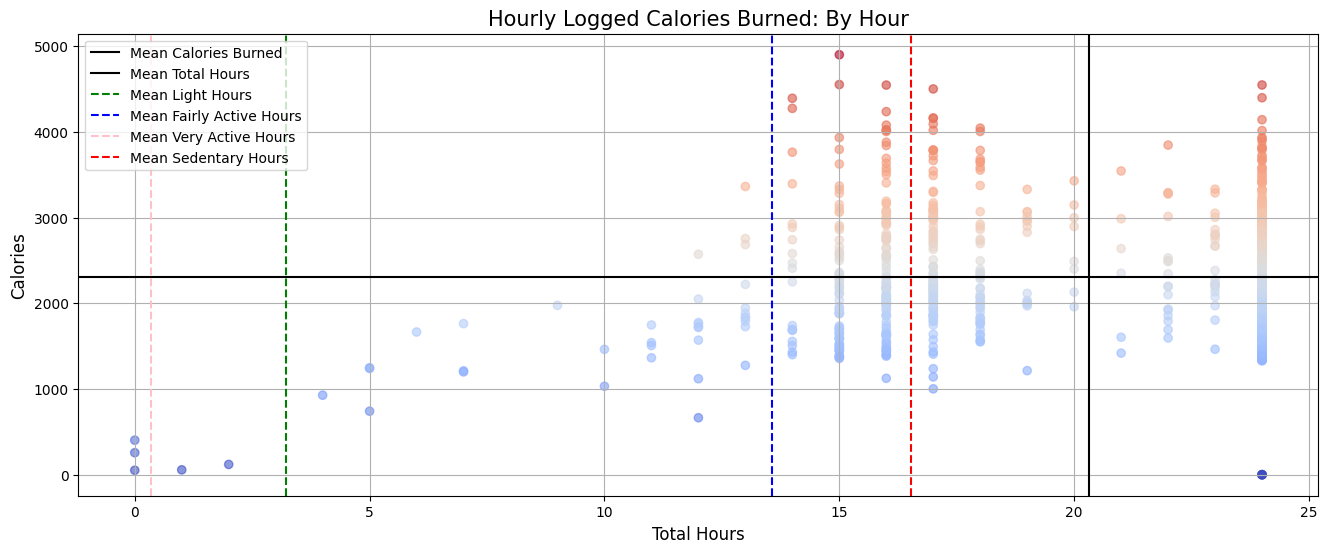

In [169]:
# viz 3 Calories burned hourly

plt.figure(figsize =(16,6))
plt.scatter(df_2['total_hours'],df_2['Calories_x'],
            alpha = 0.6,c=df_2['Calories_x'],cmap ='coolwarm',)

plt.xlabel('Total Hours', fontsize = 12)
plt.ylabel('Calories', fontsize =12)
plt.title("Hourly Logged Calories Burned: By Hour", fontsize = 15)
plt.axhline(mean_calories, color ='Black', label = 'Mean Calories Burned')
plt.axvline(mean_hours, color ='Black', label = 'Mean Total Hours')
plt.axvline(mean_light, color ='Green', label = 'Mean Light Hours', linestyle ="--")
plt.axvline(mean_fairlyActive, color ='blue', label = 'Mean Fairly Active Hours', linestyle ="--")
plt.axvline(mean_V_active, color ='pink', label = 'Mean Very Active Hours', linestyle ="--")
plt.axvline(mean_sedentary, color ='red', label = 'Mean Sedentary Hours', linestyle ="--")

plt.legend()
plt.grid()
plt.show()

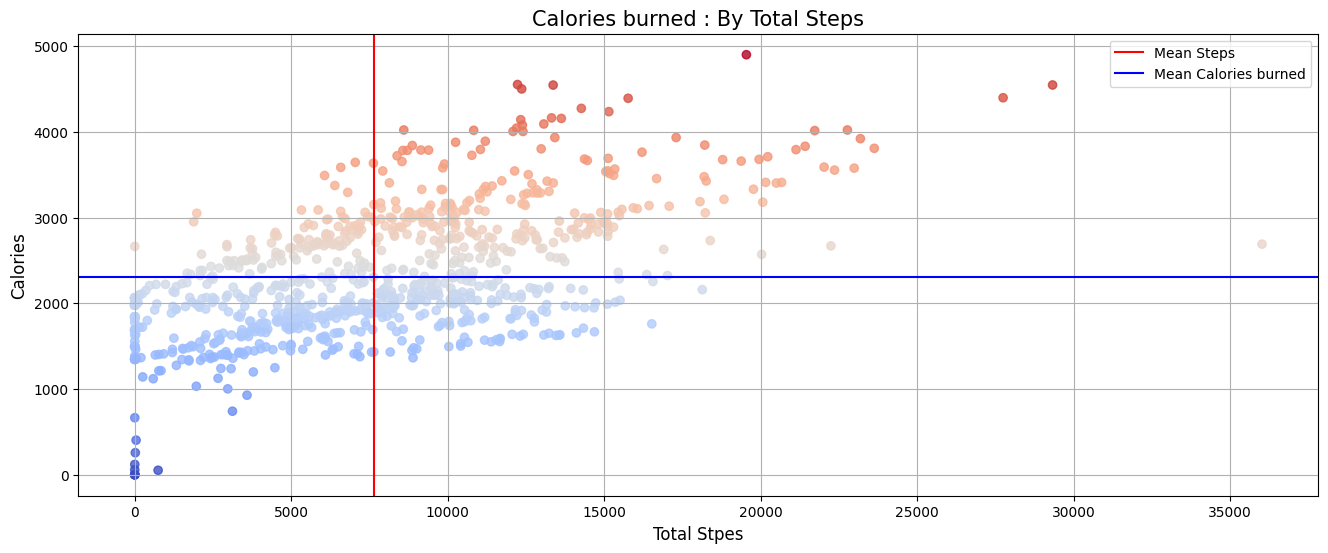

Average Distance Walked: 5.49 
Average Steps Walked: 7637.911


In [170]:
# Viz 4 calories burned : by steps

plt.figure(figsize = (16,6))
plt.scatter(df_2['TotalSteps'],df_2['Calories_x'],
           alpha =0.8, c =df_2['Calories_x'], cmap = "coolwarm" )

plt.xlabel("Total Stpes", fontsize = 12)
plt.ylabel("Calories", fontsize = 12)
plt.title("Calories burned : By Total Steps", fontsize = 15)
plt.axvline(mean_steps, color = 'red', label = 'Mean Steps')
plt.axhline(mean_calories, color ='Blue', label = 'Mean Calories burned')

plt.grid()
plt.legend()
plt.show()

print("Average Distance Walked:", mean_distance, "\nAverage Steps Walked:", mean_steps)

The scatter plot paints a clear picture: the more steps a person takes, the more calories they burn. It’s a straightforward yet powerful reminder of how staying active benefits overall health. Tthere’s one striking outlier at 36,000 steps—an impressive display of dedication to movement! The Plot shows:

- **Positive Correlation**: Increased steps lead to higher calorie burn, showcasing the benefits of physical activity.

- Average Activity Levels:

   * **Average Distance Walked**: 5.49 kilometers.

   * **Average Steps Taken**: 7,637.91 steps daily.

   * **Average Calories Burned**: 2,303 calories.

- **Step Interval**: Average step count ranges between 1,500–1,600 steps.

- **Outlier**: An unusual data point observed at 36,000 steps.

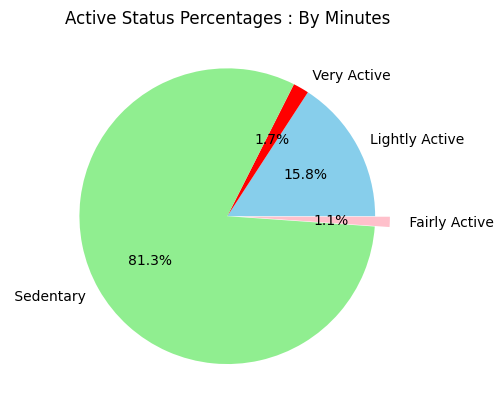

In [185]:
#viz 4
L_active = df_2.LightlyActiveMinutes_x.sum()
F_active = df_2.FairlyActiveMinutes_x.sum()
V_active = df_2.VeryActiveMinutes_x.sum()
S_active = df_2.SedentaryMinutes_x.sum()

sections = [L_active, V_active, S_active , F_active]
legend = ["Lightly Active"," Very Active"," Sedentary"," Fairly Active"]
explode = [0,0,0,0.1]
color = ['skyBlue','red', 'lightgreen', 'pink']

plt.pie(sections, labels = legend, colors = color, explode = explode, autopct = "%1.1f%%")
plt.title("Active Status Percentages : By Minutes")

plt.show()

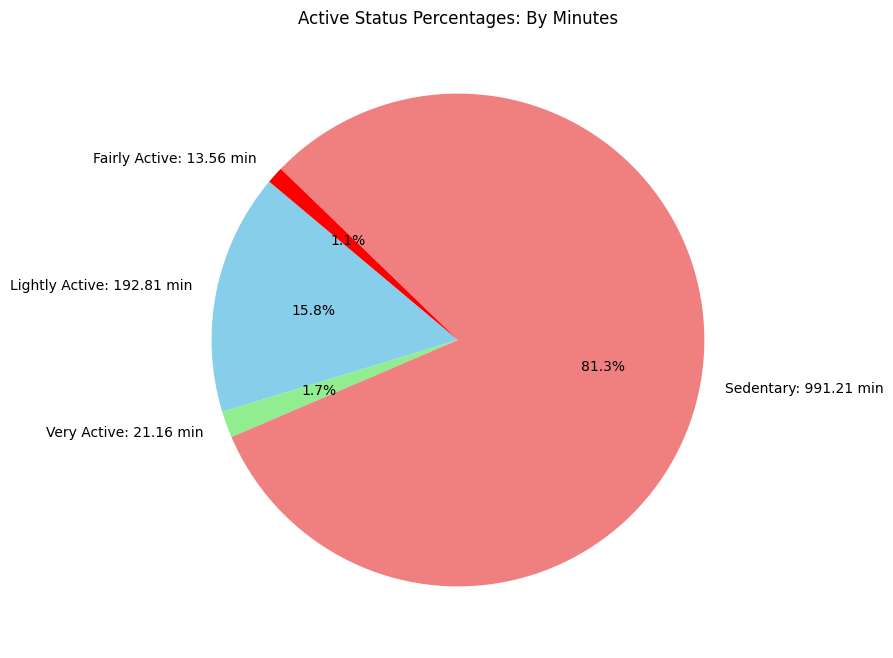

In [188]:

L_active = df_2.LightlyActiveMinutes_x.sum()
F_active = df_2.FairlyActiveMinutes_x.sum()
V_active = df_2.VeryActiveMinutes_x.sum()
S_active = df_2.SedentaryMinutes_x.sum()

sections = [L_active, V_active, S_active, F_active]
labels = [
    f"Lightly Active: {round(L_active / len(df_2), 2)} min",
    f"Very Active: {round(V_active / len(df_2), 2)} min",
    f"Sedentary: {round(S_active / len(df_2), 2)} min",
    f"Fairly Active: {round(F_active / len(df_2), 2)} min"
]


colors = [
    'skyblue',   # Lightly Active
    'lightgreen',       # Very Active
    'lightcoral',# Sedentary
    'red' # Fairly Active
]

explode = [0, 0, 0, 0]  

plt.figure(figsize=(8, 8))
plt.pie(sections, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", startangle=140)
plt.title("Active Status Percentages: By Minutes")

plt.show()

Based on [WebMD](https://www.webmd.com/fitness-exercise/workout-plans-for-women-what-to-know)’s recommendations, women should aim for 150 minutes of moderate-intensity or 75 minutes of vigorous activity weekly, alongside two days of muscle-strengthening exercises. Moderate activities like brisk walking and cycling raise your heart rate, while vigorous activities such as running and swimming are more intense, leaving you out of breath. Strength training should focus on all major muscle groups and be intense enough to induce fatigue.

Key Points from the Graph:
- Lightly Active: 192.81 minutes (recommended: 150 minutes moderate-intensity)
- Fairly Active: 13.56 minutes (recommended: 150 minutes moderate-intensity)
- Very Active: 21.16 minutes (recommended: 75 minutes vigorous activity)
- Sedentary: 991.21 minutes (should aim for less)

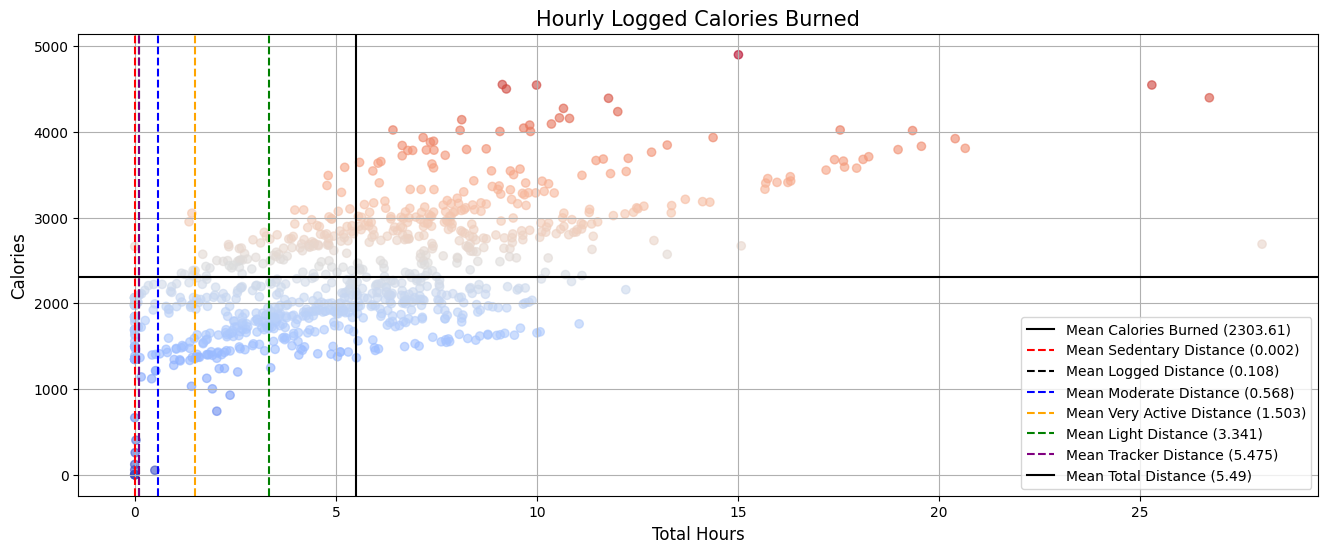

In [172]:
# viz 6 Calories burned hourly

plt.figure(figsize =(16,6))
plt.scatter(df_2['TotalDistance'],df_2['Calories_x'],
            alpha = 0.6,c=df_2['Calories_x'],cmap ='coolwarm',)

plt.xlabel('Total Hours', fontsize=12)
plt.ylabel('Calories', fontsize=12)
plt.title("Hourly Logged Calories Burned", fontsize=15)
plt.axhline(mean_calories, color='Black', label=f'Mean Calories Burned ({mean_calories})')

plt.axvline(mean_sedentary_d, color='red', label=f'Mean Sedentary Distance ({mean_sedentary_d})', linestyle="--")
plt.axvline(mean_logged_d, color='black', label=f'Mean Logged Distance ({mean_logged_d})', linestyle="--")
plt.axvline(mean_moderate_d, color='blue', label=f'Mean Moderate Distance ({mean_moderate_d})', linestyle="--")
plt.axvline(mean_V_active_d, color='orange', label=f'Mean Very Active Distance ({mean_V_active_d})', linestyle="--")
plt.axvline(mean_light_d, color='Green', label=f'Mean Light Distance ({mean_light_d})', linestyle="--")
plt.axvline(mean_logged_d, color='purple', label=f'Mean Tracker Distance ({mean_tracker_d})', linestyle="--")
plt.axvline(mean_distance, color='Black', label=f'Mean Total Distance ({mean_distance})')

plt.legend()
plt.grid()
plt.show()

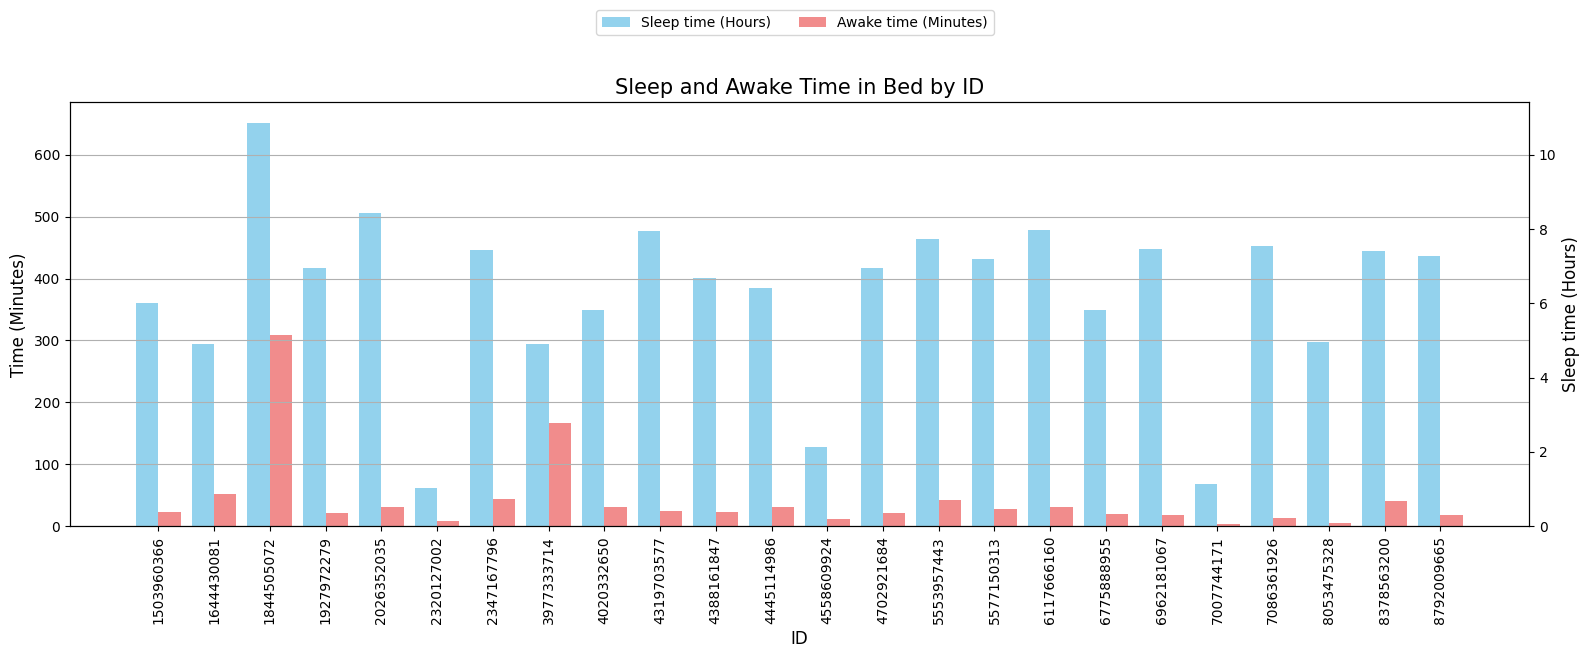

In [176]:
#viz 7
# Create positions for the bars
x = np.arange(len(sleep_mean_df['Id']))

bar_width = 0.4

fig, ax1 = plt.subplots(figsize=(16, 6))

# Primary y-axis (left) showing sleep and awake times in minutes
bar1 = ax1.bar(x - bar_width/2, sleep_mean_df['mean_sleep'], width=0.4, color='skyblue', label='Sleep time (Hours)', alpha=0.9)
bar2 = ax1.bar(x + bar_width/2, sleep_mean_df['mean_inBed_awake'], width=0.4, color='lightcoral', label='Awake time (Minutes)', alpha=0.9)
ax1.set_xlabel("ID", fontsize=12)
ax1.set_ylabel("Time (Minutes)", fontsize=12)
ax1.set_title("Sleep and Awake Time in Bed by ID", fontsize=15)
ax1.set_xticks(x)
ax1.set_xticklabels(sleep_mean_df['Id'].astype(str), rotation=90)
ax1.grid(axis='y')

# Secondary y-axis (right) showing sleep time in hours
ax2 = ax1.twinx()
ax2.set_ylabel("Sleep time (Hours)", fontsize=12)

# Convert the left y-axis scale (minutes) to hours for the right y-axis
ax2.set_ylim(ax1.get_ylim()[0] / 60, ax1.get_ylim()[1] / 60)

# Add legends for both bars
fig.legend(loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.1))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


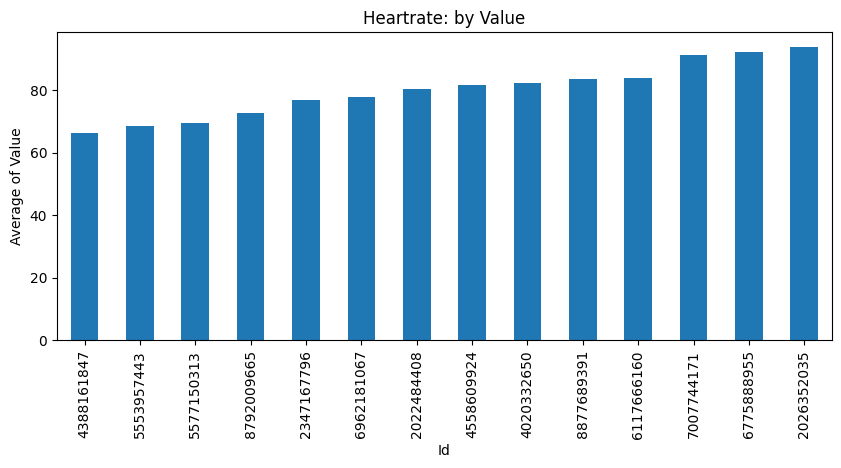

In [182]:
#viz 8
heart.groupby('Id')['Value'].mean().sort_values().plot(kind='bar', figsize=(10, 4))
plt.ylabel('Average of Value')
plt.title("Heartrate: by Value")  
plt.show()

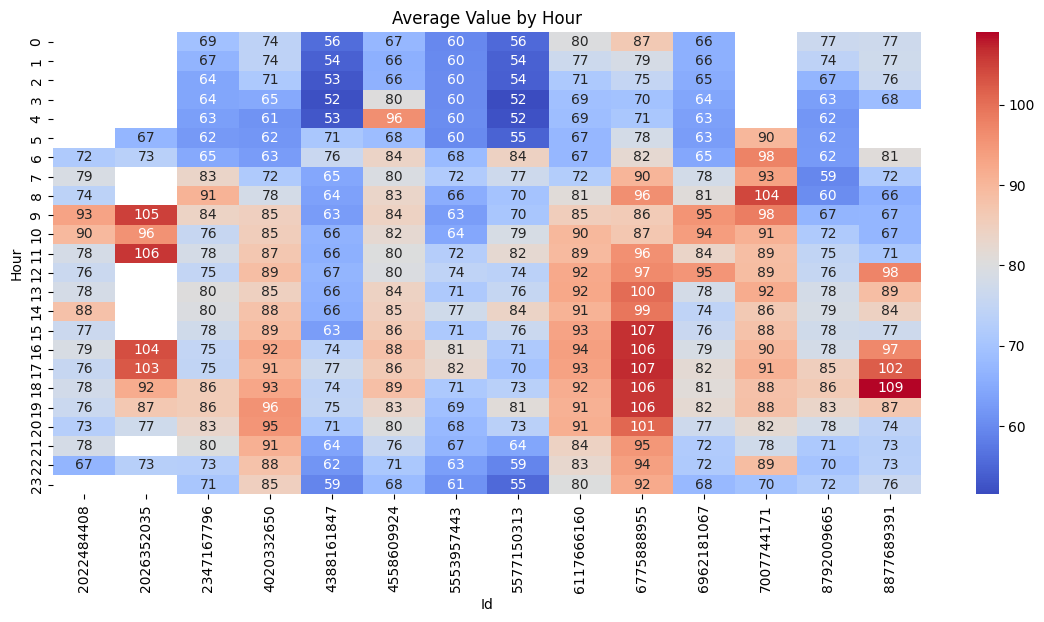

In [178]:
# Viz 9

heatmap_data = heart.pivot_table(index='Hour', columns='Id', values='Value', aggfunc='mean')


plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")  # No scientific notation
plt.title('Average Value by Hour')
plt.show()